In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.


(30, 2)
(2, 1)


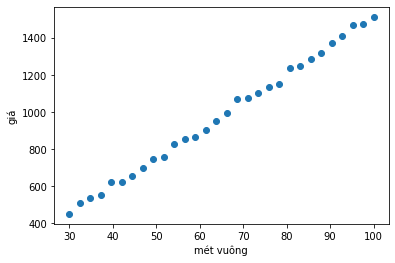

In [178]:
data = pd.read_csv("data_linear.csv").values
N = data.shape[0]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

print(x.shape)
print(w.shape)

In [179]:
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001

# def gradient_descent(learning_rate, cost):
    
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    # correct the shape dimension
    w = w - learning_rate * np.dot(x.T, r)
    # print('step {}, cost: {}'.format(i, cost[i]))

print(w)

[[ 0.19471286]
 [15.10986529]]


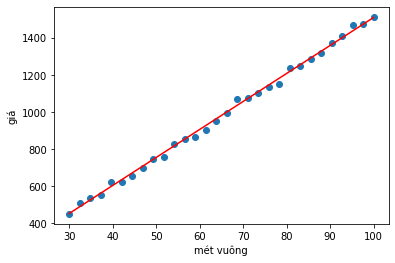

In [180]:
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

Viết code numpy, tìm model linear regression cho bài toán dự đoán giá nhà, dataset:\
 https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [181]:
df = pd.read_csv("housing.csv",  header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [182]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [183]:
df['ones'] = np.ones((df.shape[0], 1))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ones
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.0


In [184]:
data = df[['ones','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT']]
x = data.values
x

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [185]:
y=np.array([df.MEDV]).reshape(-1,1)

In [186]:
w = np.arange(0,df.shape[1]-1,dtype=float).reshape(-1,1)
w

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.]])

In [187]:
iters = 100
cost = np.zeros((iters,1))
lr = 0.000001
for i in range(0, iters):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w = w - lr * np.dot(x.T, r)
    # print('step {}, cost: {}'.format(i, cost[i]))
w

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


array([[1.48458576e+218],
       [6.65278497e+218],
       [1.48041569e+219],
       [1.79415058e+219],
       [1.01603965e+217],
       [8.44795752e+217],
       [9.26994202e+218],
       [1.05908874e+220],
       [5.31749166e+218],
       [1.64140976e+219],
       [6.54841420e+220],
       [2.76968538e+219],
       [5.29106206e+220],
       [1.97939244e+219]])